In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)
import os
from astropy.io import ascii
cwd = os.getcwd()
os.chdir(cwd + '/..')
from gcex.utils.input_output import cosmic_read_helper, read_in_for_paper
from gcex.utils.input_output import gr_pdot
from gcex.utils.getlcs import get_lcs_test
os.chdir(cwd)
import pickle
import pandas 
import pandas as pd
import pdb

# Timing

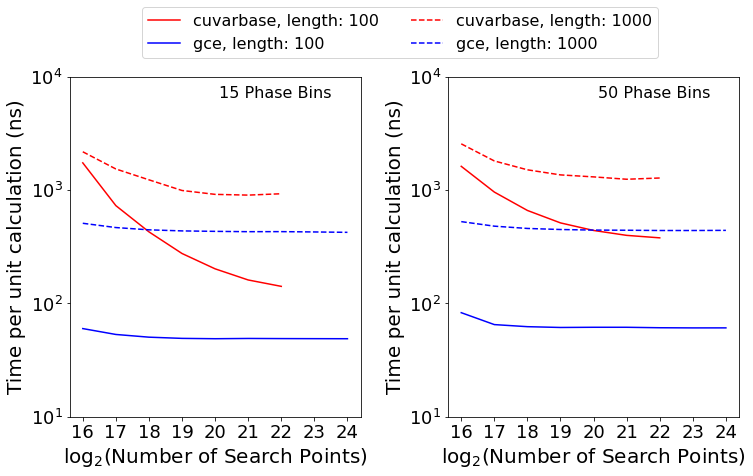

In [2]:
fig, ax = plt.subplots(1, 2, sharex=True, sharey=False)
fig.set_size_inches(12, 7)
plt.subplots_adjust(hspace=0.0, wspace=0.3, right=0.9, top=0.8)
num_pdots = 256

tick_fontsize = 18
label_fontsize = 20

# get data
phase_bin_list = [15, 50]
num_points = [100, 1000]
colors = ['blue', 'red']
lss = ['solid', 'dashed']


for pb, ax1 in zip(phase_bin_list, ax):
    for nps, ls in zip(num_points, lss): 
        num_freqs, total, per = np.load('data/cuvar_{}_{}.npy'.format(nps, pb)).T
        #ax1.plot(np.log2(num_freqs*num_pdots), np.log10(total))
        label = 'cuvarbase, length: {}'.format(nps)
        #print('cuvar', nps, pb, num_freqs, per)
        ax1.plot(np.log2(num_freqs), np.log10(per), label=label, color='red', ls=ls)
        
        num_freqs, total, per = np.load('data/gce_{}_{}.npy'.format(nps, pb))[7:].T
        label = 'gce, length: {}'.format(nps)
        #print('gce', nps, pb, num_freqs, per)
        ax1.plot(np.log2(num_freqs), np.log10(per), label=label, color='blue', ls=ls)
        
        #if nps == 100 and pb == 50:
        #    num_freqs, total, per = np.load('data/pdot_check_timing_results_{}_{}.npy'.format(pb, nps))
        #    #ax1.plot(np.log2(num_freqs*num_pdots), np.log10(total))
        #    label = '{} Phase Bins, {} Light Curve Points'.format(pb, nps)
        #    ax1.plot(np.log2(num_freqs*num_pdots), np.log10(per), label=label, color='k', ls=ls)
        
for ax1 in ax:
    for tick in ax1.xaxis.get_major_ticks():
        tick.label.set_fontsize(tick_fontsize) 

num_freqs = 2**16


#for i in [15, 50]:
#    num_pdots, total, per = np.load('data/timing_results_2_{}_{}.npy'.format(, 1000))
#    ax1.plot(np.log2(num_freqs*num_pdots), np.log10(per))#, label=label, color=color, ls=ls)

time_ticks = [-8, -7, -6, -5]
time_tick_labels = [r'$10^{1}$', r'$10^{2}$', r'$10^{3}$', r'$10^{4}$']
for ax1 in ax:
    ax1.set_yticks(time_ticks)
    ax1.set_yticklabels(time_tick_labels, fontsize=tick_fontsize)
    ax1.set_ylabel('Time per unit calculation (ns)', fontsize=label_fontsize)
    ax1.set_xlabel(r"log$_2$(Number of Search Points)", fontsize=label_fontsize)
ax[1].legend(loc='center right', prop={'size':16}, ncol=2, bbox_to_anchor=[0.75, 1.13])
ax[0].text(0.9, 0.95, '15 Phase Bins', horizontalalignment='right',
           verticalalignment='center', transform=ax[0].transAxes, fontsize=16)
ax[1].text(0.9, 0.95, '50 Phase Bins', horizontalalignment='right',
           verticalalignment='center', transform=ax[1].transAxes, fontsize=16)
fig.savefig("figures/timing_example.pdf", dpi=200)

# Light Curve Example

19.448255642243804


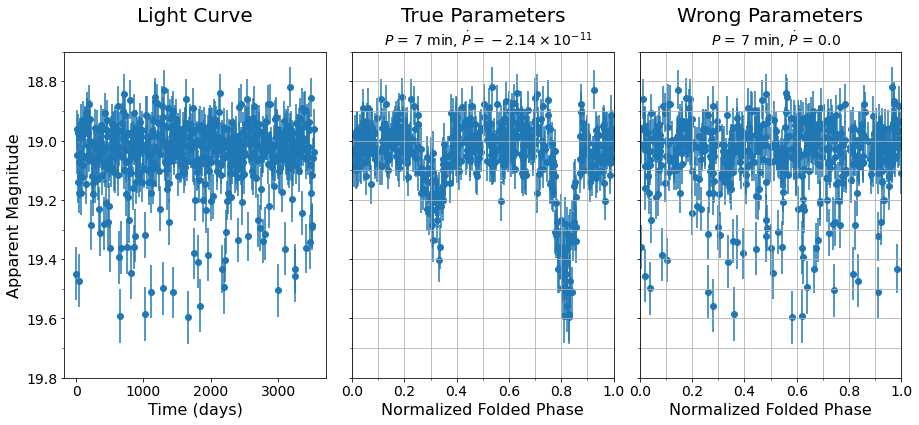

In [3]:
import pickle
with open('../input/curated_data_0_19.pickle', 'rb') as f:
    check = pickle.load(f)

keys = list(check.keys())

plt.close()
fig, ax = plt.subplots(1, 3, sharey=True)
ax = ax.ravel()
plt.subplots_adjust(wspace=0.1, hspace=0.1)
fig.set_size_inches(15.0, 6.0)

titles = ['Light Curve', 'True Parameters', 'Wrong Parameters']

for (ax_i, title) in zip(ax, titles):
    ax_i.set_title(title, fontsize=20, pad=30)

for ax_i in ax:
    ax_i.tick_params('both', labelsize=14)

ind = 3
binary = check[keys[ind]]

input_dict = binary.get('params')

#print(input_dict.get('incl'))
#print(pdot.shape)

lcs = [np.array([binary.get('t'), binary.get('true_mag'), binary.get('err')]).T]
#print(pdot.max())

period = input_dict['period']
frequency = 1./period
pdot = input_dict['Pdot']


wrong_period = period
wrong_pdot = 0.0
wrong_frequency = 1/wrong_period

t = lcs[0][:,0] + np.random.rand()
mags = lcs[0][:,1]
print(mags[0])
errors = lcs[0][:,2]

#print(mags.min() - np.median(mags))

fold = np.fmod(t-0.5*pdot*frequency*(t*t), period)*frequency
wrong_fold = np.fmod(t-0.5*wrong_pdot*wrong_frequency*(t*t), wrong_period)*wrong_frequency
#print(wrong_fold.min(), wrong_fold.max())

ax[0].errorbar(t, mags, yerr=errors, fmt='o', zorder=1)
ax[1].errorbar(fold, mags, yerr=errors, fmt='o', zorder=1)
ax[2].errorbar(wrong_fold, mags, yerr=errors, fmt='o', zorder=1)

"""
ax[0].scatter(t, mags, s=10, color='orange', zorder=10)
ax[1].scatter(fold, mags, s=10, color='orange', zorder=10)
ax[2].scatter(wrong_fold, mags, s=10, color='orange', zorder=10)
"""

for ax_i in ax:
    ax_i.set_ylim(19.8, 18.7)
    
#ax[0].set_yticks([19.4, 19.3, 19.2, 19.1, 19.0])

limits = (0.7, 1.05)
#ax[0].set_ylim(*limits)

#ax[1].set_xticks([0.0, 0.2, 0.4, 0.6, 0.8])
for ax_i in ax[1:3]:
    ax_i.set_xlim(0.0, 1.0)
    ax_i.xaxis.set_minor_locator(AutoMinorLocator(2))
    ax_i.yaxis.set_minor_locator(AutoMinorLocator(2))
    ax_i.grid(True, which='both')

ax[1].text(0.52, 1.02, r'$P$ = 7 min, $\dot{P} = -2.14\times10^{-11}$',
                   transform=ax[1].transAxes,
                   ha='center', fontsize=14)

ax[2].text(0.52, 1.02, r'$P$ = 7 min, $\dot{P}$ = 0.0',
                   transform=ax[2].transAxes,
                   ha='center', fontsize=14)

#ax[0].set_ylim(0.85, 1.05)
for i in range(7):
    ax[0].set_ylabel('Apparent Magnitude', fontsize=16)

ax[0].set_xlabel('Time (days)', fontsize=16)
ax[1].set_xlabel('Normalized Folded Phase', fontsize=16)
ax[2].set_xlabel('Normalized Folded Phase', fontsize=16)
#fig.savefig('figures/light_curve_comp_{}_pdots.pdf'.format(string), dpi=200)
fig.savefig('figures/light_curve_example_19.pdf', dpi=200)
#print("correct period:", period*24*60, "correct pdot:", pdot)
#print("wrong period:", wrong_period*24*60, "wrong pdot:", wrong_pdot)

# Populations

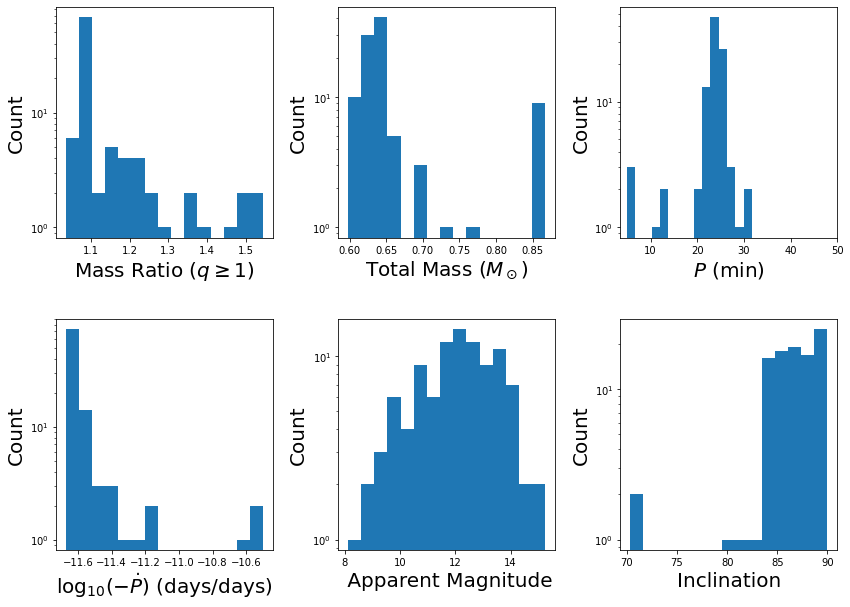

In [4]:
plt.close()

lcs, true_vals = read_in_for_paper(
    "../input/cosmic_data.pickle", true_mag=True, num_max=100
)
    
params = {}

for i, ch in enumerate(true_vals):
    params_temp = ch
    if i == 0:
        params = {key: [value] for key, value in params_temp.items()}
        
    else:
        for key, value in params_temp.items():
            params[key].append(value)

max_num = 100
params = {key: np.asarray(value)[:max_num] for key, value in params.items()}
show_keys = ['q', 'm_tot', 'period', 'Pdot', 'mag', 'incl']
labels = [r'Mass Ratio ($q\geq1$)', r'Total Mass ($M_\odot$)', r'$P$ (min)', r'log$_{10}(-\dot{P})$ (days/days)', ' Apparent Magnitude', 'Inclination'] # check parsec
fig, ax = plt.subplots(2,3)
plt.subplots_adjust(hspace=0.35, wspace=0.3, right=0.9)
ax = ax.ravel()
fig.set_size_inches(14,10)

label_fontsize = 20

breaks = [10, 12]
for i in range(len(breaks) - 1):
    up = breaks[i+1]
    down = breaks[i]
    
    #inds = (np.log10(params['period']) > down) & (np.log10(params['period']) < up)
    
    inds = (params['period']<1/24.0) & (params['mag'] > down) & (params['mag'] < up)
    
    inds = np.arange(len(params['period']))
    for axis, key, label in zip(ax, show_keys, labels):
        input_val = params[key][inds]*24*60 if key == 'period' else params[key][inds]
        if key == 'Pdot':
            input_val = np.log10(-params[key][inds])

        axis.hist(input_val, bins=15, log=True)#, histtype='step')
        axis.set_xlabel(label, fontsize=label_fontsize)

for axis in ax:
    axis.set_ylabel('Count', fontsize=label_fontsize)
    
#h = ax[-1].hist2d(np.log10(params['period']), np.log10(-params['Pdot']), bins=15, norm=LogNorm())
#fig.colorbar(h[3])
#ax[-1].set_ylabel(r'$\dot{P}$ (days/days)', fontsize=label_fontsize)
#ax[-1].set_xlabel(r'$P$ (days)', fontsize=label_fontsize)

ax[2].set_xticks([10, 20, 30, 40, 50])
fig.savefig('figures/population_parameters_cosmic.pdf')

## Output Data

In [5]:
index = ['Binary {}'.format(i) for i in range(1, 7)]
columns = ['Best Period', 'True Period', 'Period Factor', 'Best Pdot', 'True Pdot', 'Pdot Factor', 'Significance', 'CE']

df = pd.DataFrame(columns=columns)
for bin_i in range(35):
    for string in ['0', '32', '128', '512']:

        fp = 'ce_curated_50_bins_{}_1.pickle'.format(string)   

        with open(fp, 'rb') as f:
            data = pickle.load(f)
    
        test_freqs = data['best_params'][0]
        test_pdots = data['best_params'][1]
        value_add_dict = {}

        true_vals = data['truth'][bin_i]
            
        try:
            value_add_dict['Best Period'] = test_freqs[bin_i].item()*24*60
            value_add_dict['Best Pdot'] = test_pdots[bin_i].item()
            
        except ValueError:
            value_add_dict['Best Period'] = test_freqs[bin_i][0]*24*60
            value_add_dict['Best Pdot'] = test_pdots[bin_i][0]
            
        value_add_dict['Significance'] = data['significance'][bin_i].item()
        value_add_dict['CE'] = 0.0

        value_add_dict['True Pdot'] = true_vals.get('Pdot')
        value_add_dict['True Period'] = true_vals.get('period')*24*60

        value_add_dict['Period Factor'] = value_add_dict['Best Period']/value_add_dict['True Period']
        value_add_dict['Pdot Factor'] = value_add_dict['Best Pdot']/value_add_dict['True Pdot']
        row_to_add = pd.Series(value_add_dict, name='{} Pdots: Binary {}'.format(string, bin_i))

        df = df.append(row_to_add)

        #print('Best:', best_period, best_pdot, sig, '\n', 'True:', true_period, true_pdot, '\n')
#df.to_csv('fast_results.csv')
df


,Best Period,True Period,Period Factor,Best Pdot,True Pdot,Pdot Factor,Significance,CE
0 Pdots: Binary 0,13.345313,4.0,3.336328,0.000000e+00,-5.436426e-11,-0.000000,5.704928,0.0
32 Pdots: Binary 0,4.000002,4.0,1.000001,-1.000000e-10,-5.436426e-11,1.839444,24.555489,0.0
128 Pdots: Binary 0,3.999999,4.0,1.000000,-9.643884e-11,-5.436426e-11,1.773938,35.777793,0.0
512 Pdots: Binary 0,4.000001,4.0,1.000000,-9.733260e-11,-5.436426e-11,1.790379,32.773108,0.0
0 Pdots: Binary 1,4.664512,5.0,0.932902,0.000000e+00,-3.747976e-11,-0.000000,6.018868,0.0
...,...,...,...,...,...,...,...,...
512 Pdots: Binary 33,5.499229,37.0,0.148628,-9.910284e-11,-1.333759e-12,74.303431,8.276781,0.0
0 Pdots: Binary 34,9.750000,39.0,0.250000,0.000000e+00,-1.221722e-12,-0.000000,7.996654,0.0
32 Pdots: Binary 34,39.000023,39.0,1.000001,-1.000000e-10,-1.221722e-12,81.851674,10.931386,0.0
128 Pdots: Binary 34,19.500011,39.0,0.500000,-9.300449e-11,-1.221722e-12,76.125736,11.348324,0.0


In [6]:
index = ['Binary {}'.format(i) for i in range(1, 7)]
columns = ['Best Period', 'True Period', 'Period Factor', 'Best Pdot', 'True Pdot', 'Pdot Factor', 'Significance']

df1 = pd.DataFrame(columns=columns)
for bin_i in range(100):
    for string in ['0', '32', '128', '512']:

        fp = 'cosmic_bins_50_{}.pickle'.format(string)  

        with open(fp, 'rb') as f:
            data = pickle.load(f)

        test_freqs = data['best_params'][0]
        test_pdots = data['best_params'][1]
        value_add_dict = {}

        true_vals = data['truth'][bin_i]
        try:
            value_add_dict['Best Period'] = test_freqs[bin_i].item()*24*60
            value_add_dict['Best Pdot'] = test_pdots[bin_i].item()
            
        except ValueError:
            value_add_dict['Best Period'] = test_freqs[bin_i][0]*24*60
            value_add_dict['Best Pdot'] = test_pdots[bin_i][0]
            
        value_add_dict['Significance'] = data['significance'][bin_i].item()
        value_add_dict['CE'] = 0.0

        value_add_dict['True Pdot'] = true_vals.get('Pdot')
        value_add_dict['True Period'] = true_vals.get('period')*24*60

        value_add_dict['Period Factor'] = value_add_dict['Best Period']/value_add_dict['True Period']
        value_add_dict['Pdot Factor'] = value_add_dict['Best Pdot']/value_add_dict['True Pdot']

        row_to_add = pd.Series(value_add_dict, name='{} Pdots: Binary {}'.format(string, bin_i))


        df1 = df1.append(row_to_add)

        #print('Best:', best_period, best_pdot, sig, '\n', 'True:', true_period, true_pdot, '\n')

df1.to_csv('figures/cosmic_periods.csv')     
print(df1['Significance'].max())
df1

33.17013147023143


,Best Period,True Period,Period Factor,Best Pdot,True Pdot,Pdot Factor,Significance,CE
0 Pdots: Binary 0,3.794875,4.845681,0.783146,0.000000e+00,-3.172434e-11,-0.000000,5.870257,0.0
32 Pdots: Binary 0,4.845678,4.845681,0.999999,-1.000000e-10,-3.172434e-11,3.152153,14.408563,0.0
128 Pdots: Binary 0,4.845680,4.845681,1.000000,-1.000000e-10,-3.172434e-11,3.152153,17.442121,0.0
512 Pdots: Binary 0,4.845681,4.845681,1.000000,-9.733260e-11,-3.172434e-11,3.068073,23.095703,0.0
0 Pdots: Binary 1,128.991590,5.195800,24.826127,0.000000e+00,-3.090376e-11,-0.000000,6.329736,0.0
...,...,...,...,...,...,...,...,...
512 Pdots: Binary 98,13.035060,26.070107,0.500000,-1.000000e-10,-2.127369e-12,47.006424,15.404700,0.0
0 Pdots: Binary 99,12.066711,24.133427,0.500000,0.000000e+00,-2.126170e-12,-0.000000,15.829901,0.0
32 Pdots: Binary 99,12.066711,24.133427,0.500000,-6.404004e-11,-2.126170e-12,30.119903,13.442635,0.0
128 Pdots: Binary 99,24.133442,24.133427,1.000001,-1.000000e-10,-2.126170e-12,47.032921,12.456078,0.0


In [7]:
index = ['Binary {}'.format(i) for i in range(1, 7)]
columns = ['Best Period', 'True Period', 'Period Factor', 'Best Pdot', 'True Pdot', 'Pdot Factor', 'Significance', 'CE']

df2 = pd.DataFrame(columns=columns)
num_light_curve_sets = 10
for i in range(num_light_curve_sets):
    for bin_i in range(35):
        for string in ['0', '32']:#, '512']: #, 'linspace_512']:
            #print(string, i, bin_i)
            fp = 'ce_curated_50_bins_{}_{}.pickle'.format(string, i)        

            with open(fp, 'rb') as f:
                data = pickle.load(f)

            test_freqs = data['best_params'][0]
            test_pdots = data['best_params'][1]
            value_add_dict = {}

            true_vals = data['truth'][bin_i]
            value_add_dict['Best Period'] = test_freqs[bin_i].item()*24*60
            value_add_dict['Best Pdot'] = test_pdots[bin_i].item()
            value_add_dict['Significance'] = data['significance'][bin_i].item()
            value_add_dict['CE'] = 0.0

            value_add_dict['True Pdot'] = true_vals.get('Pdot')
            value_add_dict['True Period'] = true_vals.get('period')*24*60

            value_add_dict['Period Factor'] = value_add_dict['Best Period']/value_add_dict['True Period']
            value_add_dict['Pdot Factor'] = value_add_dict['Best Pdot']/value_add_dict['True Pdot']
            
            row_to_add = pd.Series(value_add_dict, name='{} Pdots/iter {}: Binary {}'.format(string, i, bin_i))

            df2 = df2.append(row_to_add)

            #print('Best:', best_period, best_pdot, sig, '\n', 'True:', true_period, true_pdot, '\n')
        #print(i, bin_i)
df2

,Best Period,True Period,Period Factor,Best Pdot,True Pdot,Pdot Factor,Significance,CE
0 Pdots/iter 0: Binary 0,4.534207,4.0,1.133552,0.000000e+00,-5.436426e-11,-0.000000,6.780428,0.0
32 Pdots/iter 0: Binary 0,4.000002,4.0,1.000001,-1.000000e-10,-5.436426e-11,1.839444,28.976738,0.0
0 Pdots/iter 0: Binary 1,240.074097,5.0,48.014819,0.000000e+00,-3.747976e-11,-0.000000,6.831805,0.0
32 Pdots/iter 0: Binary 1,10.000000,5.0,2.000000,-1.000000e-10,-3.747976e-11,2.668107,21.533441,0.0
0 Pdots/iter 0: Binary 2,10.721147,6.0,1.786858,0.000000e+00,-2.765846e-11,-0.000000,6.365532,0.0
...,...,...,...,...,...,...,...,...
32 Pdots/iter 9: Binary 32,18.000000,36.0,0.500000,-8.619536e-11,-1.396077e-12,61.741133,10.910853,0.0
0 Pdots/iter 9: Binary 33,4.624999,37.0,0.125000,0.000000e+00,-1.333759e-12,-0.000000,7.164853,0.0
32 Pdots/iter 9: Binary 33,18.500014,37.0,0.500000,-8.619536e-11,-1.333759e-12,64.625904,10.818478,0.0
0 Pdots/iter 9: Binary 34,3.622137,38.0,0.095319,0.000000e+00,-1.275775e-12,-0.000000,6.537998,0.0


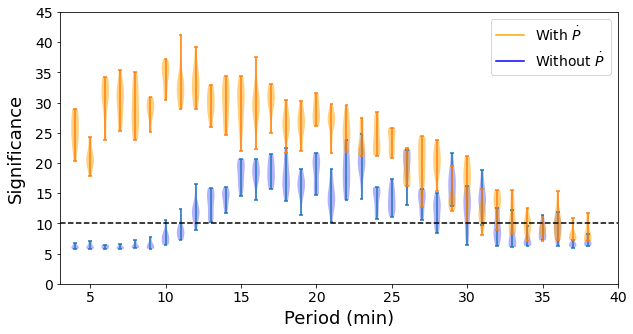

In [8]:
fig = plt.figure()

sig_pdot = np.asarray([df2['Significance']['{} Pdots/iter {}: Binary {}'.format('32', j, i)] for i in range(35) for j in range(10)]).reshape(35, 10).T#, axis=1)
sig_no_pdots = np.asarray([df2['Significance']['{} Pdots/iter {}: Binary {}'.format('0', j, i)] for i in range(35) for j in range(10)]).reshape(35, 10).T#, axis=1)
true_periods = np.asarray([df2['True Period']['{} Pdots/iter {}: Binary {}'.format('32', 0, i)] for i in range(35)])

#print(sig_pdot)
parts = plt.violinplot(sig_no_pdots, positions=true_periods)#, label=r'With $\dot{P}$')
for pc in parts['bodies']:
    pc.set_facecolor('blue')

parts = plt.violinplot(sig_pdot, positions=true_periods)#, label=r'Without $\dot{P}$')
for pc in parts['bodies']:
    pc.set_facecolor('orange')
    pc.set_alpha(0.5)

plt.plot([-1000, -1000], [-1000, -2000], label=r'With $\dot{P}$', color='orange')
plt.plot([-1000, -1000], [-1000, -2000], label=r'Without $\dot{P}$', color='blue')
fig.set_size_inches(10,5)
plt.axhline(10.0, color='k', ls='--')
plt.xlabel('Period (min)', fontsize=18)
plt.ylabel('Significance', fontsize=18, labelpad=10)
plt.ylim(0, 45)
plt.xlim(3, 40)
ax = plt.gca()
plt.legend(loc='upper right', prop=dict(size=14))
ax.tick_params(axis='both', which='major', labelsize=14)
plt.savefig('figures/significance_difference.pdf', dpi=200)

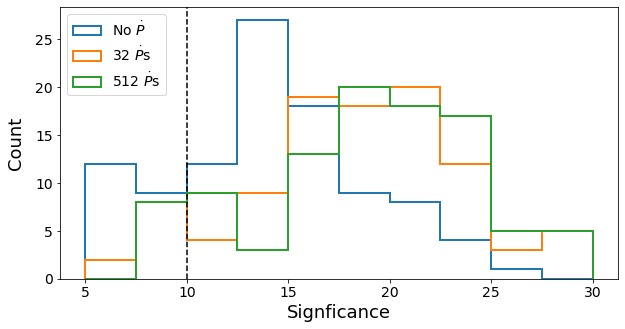

In [9]:
fig = plt.figure()
fig.set_size_inches(10, 5)
bins = np.arange(5.0, 32.5, 2.5)
for num_pdots, label in zip(['0', '32', '512'], [r'No $\dot{P}$', '32 $\dot{P}$s', '512 $\dot{P}$s']):
    for dataF, num in zip([df1], [100]):
        sig = np.asarray([dataF['Significance']['{} Pdots: Binary {}'.format(num_pdots, i)] for i in range(num)])
        plt.hist(sig, bins=bins, histtype='step', label=label, lw=2)
        
plt.xlabel('Signficance', fontsize=18)
plt.ylabel('Count', fontsize=18, labelpad=10)
ax = plt.gca()

#print(np.where(np.asarray(dataF['Significance']) < 10.0)[0] % 4)

ax.tick_params(axis='both', which='major', labelsize=14)
ax.axvline(10, ls='dashed', color='k')
plt.legend(loc='upper left', prop=dict(size=14))
fig.savefig('figures/cosmic_sig_histogram.pdf', dpi=200)

## Visual Turnover

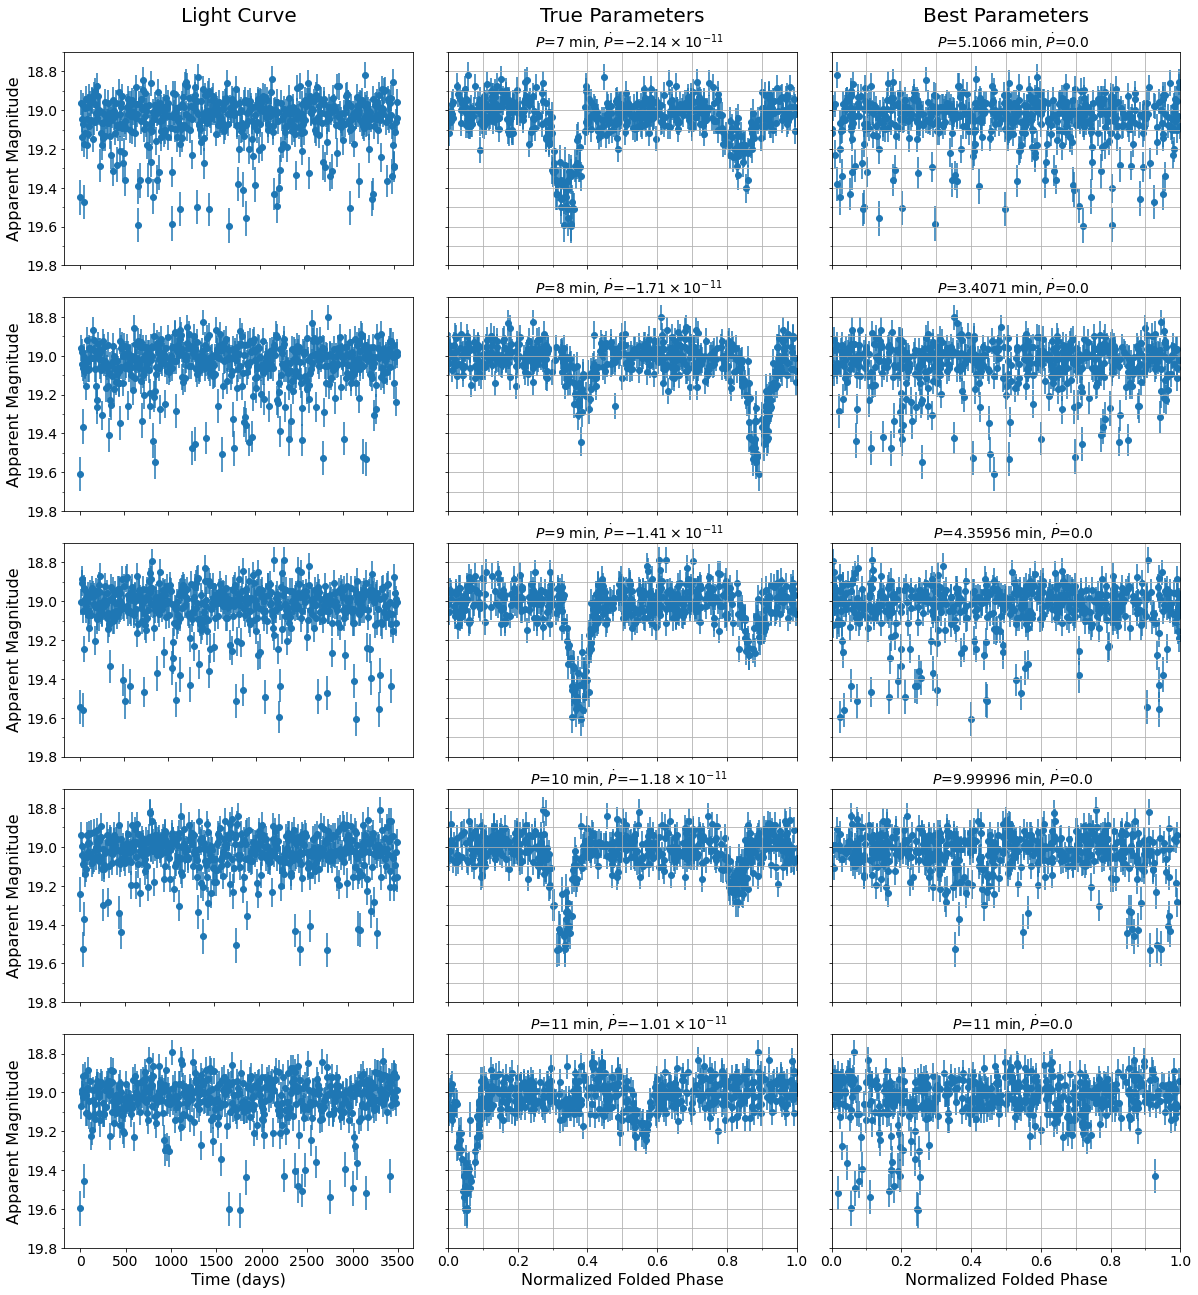

In [10]:
import pickle
with open('../input/curated_data_0_19.pickle', 'rb') as f:
    check = pickle.load(f)

keys = list(check.keys())

true_pdots = [r'$-2.14\times10^{-11}$',
              r'$-1.71\times10^{-11}$',
              r'$-1.41\times10^{-11}$', 
              r'$-1.18\times10^{-11}$',
              r'$-1.01\times10^{-11}$']

for string in ['0']:#, '32', '128', '512']:
    plt.close()
    fig, ax = plt.subplots(5, 3, sharey=True)
    ax = ax.ravel()
    plt.subplots_adjust(wspace=0.1, hspace=0.15)
    fig.set_size_inches(20.0, 22.0)

    titles = ['Light Curve', 'True Parameters', 'Best Parameters']

    for (ax_i, title) in zip(ax, titles):
        ax_i.set_title(title, fontsize=20, pad=30)

    for ax_i in ax:
        ax_i.tick_params('both', labelsize=14)


    for ax_i in ax[0:12]:
        labels = [item.get_text() for item in ax_i.get_xticklabels()]

        empty_string_labels = ['']*len(labels)
        ax_i.set_xticklabels(empty_string_labels)

    for ind in range(5):
        plus = 3
        times = 1
        binary = check[keys[ind*times + plus]]

        input_dict = binary.get('params')

        #print(input_dict.get('incl'))
        #print(pdot.shape)

        lcs = [np.array([binary.get('t'), binary.get('true_mag'), binary.get('err')]).T]
        #print(pdot.max())

        period = input_dict['period']
        frequency = 1./period
        pdot = input_dict['Pdot']


        wrong_period =  df['Best Period']['{} Pdots: Binary {}'.format(string, ind*times + plus)]/(24*60)  # np.abs((1+np.random.randn()))*period
        wrong_pdot = df['Best Pdot']['{} Pdots: Binary {}'.format(string, ind*times + plus)] #pdot*4 # (1+np.random.randn())*pdot
        wrong_frequency = 1/wrong_period

        t = lcs[0][:,0] + np.random.rand()
        mags = lcs[0][:,1]
        errors = lcs[0][:, 2]

        #print(mags.min() - np.median(mags))

        fold = np.fmod(t-0.5*pdot*frequency*(t*t), period)*frequency
        wrong_fold = np.fmod(t-0.5*wrong_pdot*wrong_frequency*(t*t), wrong_period)*wrong_frequency
        #print(wrong_fold.min(), wrong_fold.max())
        
        #print(mags)
        ax[ind*3 + 0].errorbar(t, mags, yerr=errors, fmt='o', zorder=1)
        ax[ind*3 + 1].errorbar(fold, mags, yerr=errors, fmt='o', zorder=1)
        ax[ind*3 + 2].errorbar(wrong_fold, mags, yerr=errors, fmt='o', zorder=1)

        limits = (0.7, 1.05)
        #ax[0].set_ylim(*limits)

        #ax[1].set_xticks([0.0, 0.2, 0.4, 0.6, 0.8])
        for ax_i in ax[ind*3 + 1:ind*3+3]:
            ax_i.set_xlim(0.0, 1.0)
            ax_i.xaxis.set_minor_locator(AutoMinorLocator(2))
            ax_i.yaxis.set_minor_locator(AutoMinorLocator(2))
            ax_i.grid(True, which='both')

        ax[3*ind + 1].text(0.52, 1.02, r'$P$=%d min, $\dot{P}$=%s'%(period*24*60, true_pdots[ind]),
                           transform=ax[3*ind + 1].transAxes,
                           ha='center', fontsize=14)

        ax[3*ind + 2].text(0.52, 1.02, r'$P$=%.6g min, $\dot{P}$=0.0'%(wrong_period*24*60),
                           transform=ax[3*ind + 2].transAxes, ha='center', fontsize=14)

    for ax_i in ax:
        ax_i.set_ylim(19.8, 18.7)
    #ax[0].set_ylim(0.85, 1.05)
    for i in range(5):
        ax[3*i].set_ylabel('Apparent Magnitude', fontsize=16)

    ax[12].set_xlabel('Time (days)', fontsize=16)
    ax[13].set_xlabel('Normalized Folded Phase', fontsize=16)
    ax[14].set_xlabel('Normalized Folded Phase', fontsize=16)
    #fig.savefig('figures/light_curve_comp_{}_pdots.pdf'.format(string), dpi=200)
    fig.savefig('figures/pdot_break_visual_19.pdf', dpi=200)
    #print("correct period:", period*24*60, "correct pdot:", pdot)
    #print("wrong period:", wrong_period*24*60, "wrong pdot:", wrong_pdot)

# True vs. Best

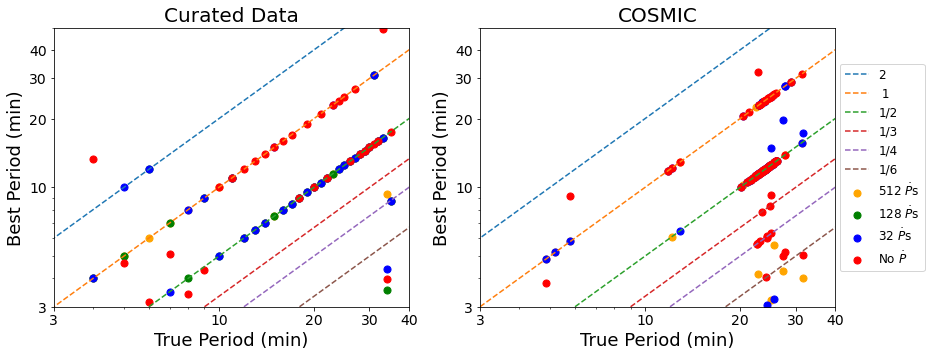

In [11]:
days_to_min = 24*60
#plt.scatter(df1['True Period']*days_to_min, df1['Best Period']*days_to_min, s=50, label='COSMIC', color='orange')
xs = np.linspace(1e-4*days_to_min, 1e-1*days_to_min)

# fast sources

fig, axes = plt.subplots(1, 2, sharex=False, sharey=False)
plt.subplots_adjust(top=0.9)
fig.set_size_inches(14, 5)
for i, (ax, df_trans, num, title) in enumerate(zip(axes, [df, df1], [32, 100], ['Curated Data', 'COSMIC'])):
    
    best_periods = np.asarray([df_trans['Best Period']['{} Pdots: Binary {}'.format('512', i)] for i in range(num)])
    true_periods = np.asarray([df_trans['True Period']['{} Pdots: Binary {}'.format('512', i)] for i in range(num)])
    size = -np.asarray([df_trans['Significance']['{} Pdots: Binary {}'.format('512', i)] for i in range(num)])
    ax.scatter(true_periods, best_periods, s=50, color='orange', label=r'512 $\dot{P}$s')

    if title == 'Curated Data':
        
    
        best_periods = np.asarray([df_trans['Best Period']['{} Pdots: Binary {}'.format('128', i)] for i in range(num)])
        true_periods = np.asarray([df_trans['True Period']['{} Pdots: Binary {}'.format('128', i)] for i in range(num)])
        size = np.asarray([df_trans['Significance']['{} Pdots: Binary {}'.format('128', i)] for i in range(num)])
        ax.scatter(true_periods, best_periods, s=50, color='green', label=r'128 $\dot{P}$s')

    best_periods = np.asarray([df_trans['Best Period']['{} Pdots: Binary {}'.format('32', i)] for i in range(num)])
    true_periods = np.asarray([df_trans['True Period']['{} Pdots: Binary {}'.format('32', i)] for i in range(num)])
    size = np.asarray([df_trans['Significance']['{} Pdots: Binary {}'.format('32', i)] for i in range(num)])
    ax.scatter(true_periods, best_periods, s=50, color='blue', label=r'32 $\dot{P}$s')
    
    best_periods = np.asarray([df_trans['Best Period']['{} Pdots: Binary {}'.format('0', i)] for i in range(num)])
    true_periods = np.asarray([df_trans['True Period']['{} Pdots: Binary {}'.format('0', i)] for i in range(num)])
    size = np.asarray([df_trans['Significance']['{} Pdots: Binary {}'.format('0', i)] for i in range(num)])
    ax.scatter(true_periods, best_periods, s=50, color='red', label=r'No $\dot{P}$')
    ax.set_title(title, fontsize=20)
    
    
labels = ['2', ' 1 ', '1/2', '1/3', '1/4', '1/6']
factors = [0.5, 1, 2, 3, 4, 6]
for ax in axes:
    for i, lab in zip(factors, labels):
        ax.loglog(xs, xs/i, label=lab, ls='--')

    ax.set_xticks([3, 10, 20, 30, 40])
    ax.set_xticklabels([3, 10, 20, 30, 40], fontsize=14)

    ax.set_yticks([3, 10, 20, 30, 40])
    ax.set_yticklabels([3, 10, 20, 30, 40], fontsize=14)

    ax.set_ylim(3, 50)
    
    ax.set_xlabel('True Period (min)', fontsize=18)
    ax.set_ylabel('Best Period (min)', fontsize=18)
    
axes[0].set_xlim(3, 40)
axes[1].set_xlim(3, 40)
axes[0].legend(loc='center right', bbox_to_anchor=[2.47, 0.5], ncol=1, prop=dict(size=12))
plt.savefig('figures/true_vs_best.pdf', dpi=200)